<a href="https://colab.research.google.com/github/seon03/MachineLearning/blob/main/lab6_nn_2003047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Table of contents

✔ Chapter 1.  Fully connected layer

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 1-1. Implement from scratch and train/test against fake data


In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_pass(self, input):
        raise NotImplementedError

    # computes dJ/dw and dJ/db and update params
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [ ]:
import numpy as np

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_pass(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dJ/dW, dJ/dB for a given loss_d=dJ/dz
    # Returns next_input=dJ/dz*w for the next step of the backpropagation.
    def backward_propagation(self, loss_d, learning_rate):
        next_input = np.dot(loss_d, self.weights.T)

        #compute dJ/dw
        weights_error = np.dot(self.input.T, loss_d)

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * loss_d
        return next_input

In [ ]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_pass(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns next_input=ReLU'(x)*(dJ/da) for the next step of backpropagation
    # learning_rate is not used as no update is needed
    def backward_propagation(self, loss_d, learning_rate):
        return self.activation_prime(self.input) * loss_d

In [ ]:
import numpy as np

# activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;


In [ ]:
import numpy as np

# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred - y_true)/y_true.size;

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # compute loss
    def compute_loss(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict for each of given inputs
    def predict(self, input_data):
        samples = len(input_data)
        result = []


        for i in range(samples):
            # forward pass
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_pass(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            # Batch gradient descent
            for j in range(samples):
                # forward pass
                a = x_train[j]
                for layer in self.layers:
                    a = layer.forward_pass(a)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], a)

                # backward propagation
                # Since the last layer is the activation layer, the output is denoted as a here
                # Note that the output of fclayer is z which is z=wx+b or z=wa+b
                # compute the derivative of loss (loss_d) with respect to activation output (a)
                loss_d = self.loss_prime(y_train[j], a)
                for layer in reversed(self.layers):
                    loss_d = layer.backward_propagation(loss_d, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [ ]:
# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])
print(x_train.shape)
print(y_train.shape)


(4, 1, 2)
(4, 1, 1)


In [ ]:
# network
net = Network()
net.add(FCLayer(2, 3)) # input (1,2), output (1,3)
net.add(ActivationLayer(sigmoid, sigmoid_prime)) # element-wise application
net.add(FCLayer(3, 1)) # input (1,3), output (1,1)
net.add(ActivationLayer(sigmoid, sigmoid_prime)) # element-wise application

# train
net.compute_loss(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

# test
out = net.predict(x_train)
print(out)

epoch 1/1000   error=0.261939
epoch 2/1000   error=0.261044
epoch 3/1000   error=0.260285
epoch 4/1000   error=0.259642
epoch 5/1000   error=0.259097
epoch 6/1000   error=0.258638
epoch 7/1000   error=0.258250
epoch 8/1000   error=0.257923
epoch 9/1000   error=0.257647
epoch 10/1000   error=0.257415
epoch 11/1000   error=0.257220
epoch 12/1000   error=0.257055
epoch 13/1000   error=0.256917
epoch 14/1000   error=0.256800
epoch 15/1000   error=0.256702
epoch 16/1000   error=0.256619
epoch 17/1000   error=0.256550
epoch 18/1000   error=0.256491
epoch 19/1000   error=0.256441
epoch 20/1000   error=0.256399
epoch 21/1000   error=0.256364
epoch 22/1000   error=0.256334
epoch 23/1000   error=0.256308
epoch 24/1000   error=0.256286
epoch 25/1000   error=0.256267
epoch 26/1000   error=0.256251
epoch 27/1000   error=0.256237
epoch 28/1000   error=0.256226
epoch 29/1000   error=0.256215
epoch 30/1000   error=0.256206
epoch 31/1000   error=0.256198
epoch 32/1000   error=0.256191
epoch 33/1000   e

It seems that the error doesn't really reduce properly. Change the activation function to use tanh

In [ ]:
# network
net = Network()
net.add(FCLayer(2, 3)) # input (1,2), output (1,3)
net.add(ActivationLayer(tanh, tanh_prime)) # change the activation function
net.add(FCLayer(3, 1)) # input (1,3), output (1,1)
net.add(ActivationLayer(tanh, tanh_prime)) # change the activation function

# train
net.compute_loss(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

# test
out = net.predict(x_train)
print(out)

epoch 1/1000   error=0.858780
epoch 2/1000   error=0.377457
epoch 3/1000   error=0.324689
epoch 4/1000   error=0.314122
epoch 5/1000   error=0.310098
epoch 6/1000   error=0.307817
epoch 7/1000   error=0.306220
epoch 8/1000   error=0.304970
epoch 9/1000   error=0.303930
epoch 10/1000   error=0.303033
epoch 11/1000   error=0.302239
epoch 12/1000   error=0.301524
epoch 13/1000   error=0.300870
epoch 14/1000   error=0.300264
epoch 15/1000   error=0.299696
epoch 16/1000   error=0.299157
epoch 17/1000   error=0.298642
epoch 18/1000   error=0.298145
epoch 19/1000   error=0.297660
epoch 20/1000   error=0.297184
epoch 21/1000   error=0.296713
epoch 22/1000   error=0.296244
epoch 23/1000   error=0.295774
epoch 24/1000   error=0.295301
epoch 25/1000   error=0.294822
epoch 26/1000   error=0.294336
epoch 27/1000   error=0.293841
epoch 28/1000   error=0.293333
epoch 29/1000   error=0.292813
epoch 30/1000   error=0.292278
epoch 31/1000   error=0.291726
epoch 32/1000   error=0.291156
epoch 33/1000   e

Now it works out!

# Chapter 1-2. train/test against MNIST data

Use MNIST dataset


*   Source: keras



In [ ]:
!pip install --target=$my_path tensorflow

In [ ]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

# load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
print(x_train[0])
x_train /= 255
print(x_train[0])
# One-hot encoding: encode output in range [0,9] into a vector of size 10
# Change to one-hot vector (e.g. 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
print(y_train[0])
y_train = np_utils.to_categorical(y_train)
print(y_train[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # compute loss
    def compute_loss(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict for each of given inputs
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []


        for i in range(samples):
            # forward pass
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_pass(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate, batch_size):
        train_len = np.array(range(len(x_train)))

        # training loop
        for i in range(epochs):
            err = 0
            # mini-batch gradient descent
            np.random.shuffle(train_len)
            for j in train_len[:batch_size]:
                # forward pass
                a = x_train[j]
                for layer in self.layers:
                    a = layer.forward_pass(a)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], a)

                # backward propagation
                # Since the last layer is the activation layer, the output is denoted as a here
                # Note that the output of fclayer is z which is z=wx+b or z=wa+b
                # compute the derivative of loss (loss_d) with respect to activation output (a)
                loss_d = self.loss_prime(y_train[j], a)
                for layer in reversed(self.layers):
                    loss_d = layer.backward_propagation(loss_d, learning_rate)

            # calculate average error on all samples
            err /= batch_size
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [ ]:
# Network
net = Network()
net.add(FCLayer(28*28, 100))                # input (1, 28*28), output (1, 100)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 50))                   # input (1, 100), output (1, 50)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(50, 10))                    # input (1, 50), output (1, 10)
net.add(ActivationLayer(tanh, tanh_prime))

net.compute_loss(mse, mse_prime)
net.fit(x_train, y_train, epochs=500, learning_rate=0.1, batch_size=256)


epoch 1/500   error=0.445394
epoch 2/500   error=0.191440
epoch 3/500   error=0.157929
epoch 4/500   error=0.146561
epoch 5/500   error=0.138146
epoch 6/500   error=0.122856
epoch 7/500   error=0.122515
epoch 8/500   error=0.115209
epoch 9/500   error=0.121889
epoch 10/500   error=0.108258
epoch 11/500   error=0.106118
epoch 12/500   error=0.092119
epoch 13/500   error=0.096592
epoch 14/500   error=0.090015
epoch 15/500   error=0.091083
epoch 16/500   error=0.083175
epoch 17/500   error=0.079155
epoch 18/500   error=0.090505
epoch 19/500   error=0.080409
epoch 20/500   error=0.080471
epoch 21/500   error=0.084026
epoch 22/500   error=0.085193
epoch 23/500   error=0.085690
epoch 24/500   error=0.073797
epoch 25/500   error=0.079580
epoch 26/500   error=0.071280
epoch 27/500   error=0.071914
epoch 28/500   error=0.076494
epoch 29/500   error=0.078473
epoch 30/500   error=0.071399
epoch 31/500   error=0.072650
epoch 32/500   error=0.063395
epoch 33/500   error=0.060532
epoch 34/500   erro

In [ ]:
out = net.predict(x_test)
tp=0
for pred, true in zip(out,y_test):
  if np.argmax(pred) == np.argmax(true):
    tp +=1
print(tp/len(x_test))

0.9249


# [Extra Credit] Could you improve the performance?
Any strategies can be acceptable such as different activation funciton, learning rate, and loss function, adding more layers and neurons, changing the epoch and batch sizes, etc.
**(Deadline:12/10 SUN 23:59)**



### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: Seon A Seo (서선아)
    Student ID: 2003047

    Name:
    Student ID:

TO-DO: Using the Network class provided above, improve the initial performance we got. Note that the model obtained 92.1% accuracy on average using five experiments (91.2%, 90.3%, 93.47%, 92.65%, 92.82%).
- Feel free to add and modify all the codes provided above
- Run the five experiments and report the average accuracy
- Discuss what changes/additions you made to improve the performance of the neural network model   

In [ ]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [ ]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(input)

    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [ ]:
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))

    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [ ]:
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size

    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [ ]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [ ]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)

        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)

    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.072169
2/40, error=0.034802
3/40, error=0.022409
4/40, error=0.017331
5/40, error=0.014243
6/40, error=0.011985
7/40, error=0.010182
8/40, error=0.008772
9/40, error=0.007665
10/40, error=0.006760
11/40, error=0.006035
12/40, error=0.005427
13/40, error=0.004904
14/40, error=0.004461
15/40, error=0.004098
16/40, error=0.003788
17/40, error=0.003521
18/40, error=0.003285
19/40, error=0.003069
20/40, error=0.002846
21/40, error=0.002649
22/40, error=0.002486
23/40, error=0.002349
24/40, error=0.002235
25/40, error=0.002150
26/40, error=0.002085
27/40, error=0.002031
28/40, error=0.001985
29/40, error=0.001946
30/40, error=0.001909
31/40, error=0.001874
32/40, error=0.001838
33/40, error=0.001797
34/40, error=0.001744
35/40, error=0.001689
36/40, error=0.001636
37/40, error=0.001553
38/40, error=0.001447
39/40, error=0.001384
40/40, error=0.001335


In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.88
mse: 0.0187


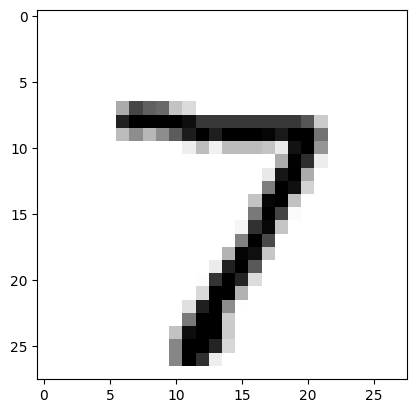

pred: 7, prob: 1.00, true: 7


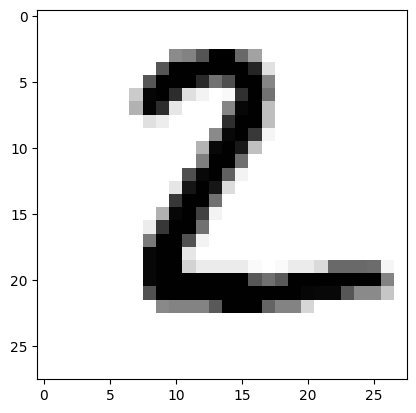

pred: 6, prob: 0.82, true: 2


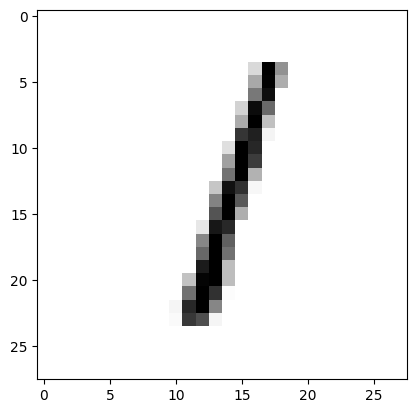

pred: 1, prob: 0.99, true: 1


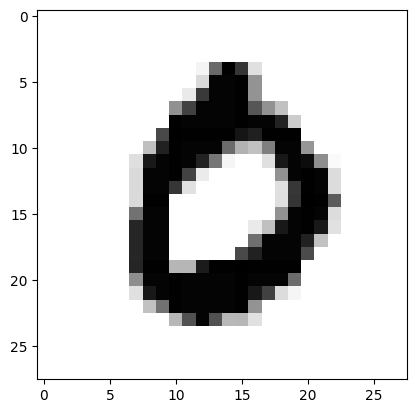

pred: 0, prob: 1.00, true: 0


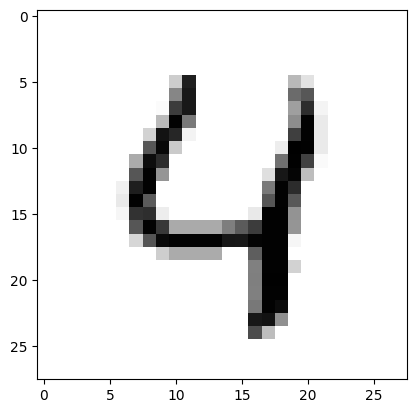

pred: 4, prob: 0.96, true: 4


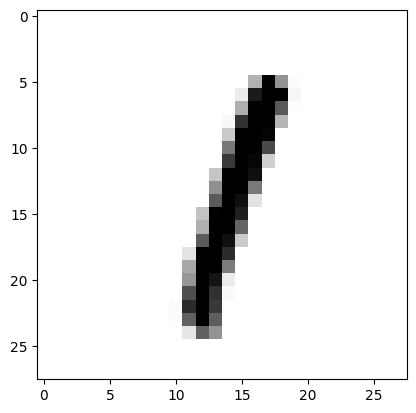

pred: 1, prob: 0.98, true: 1


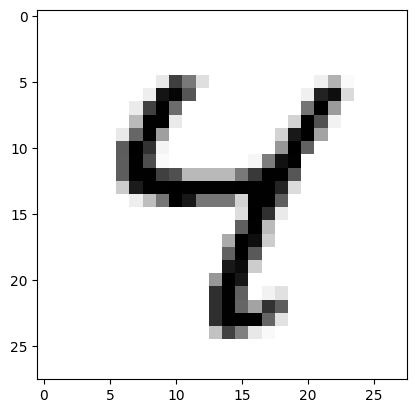

pred: 4, prob: 0.98, true: 4


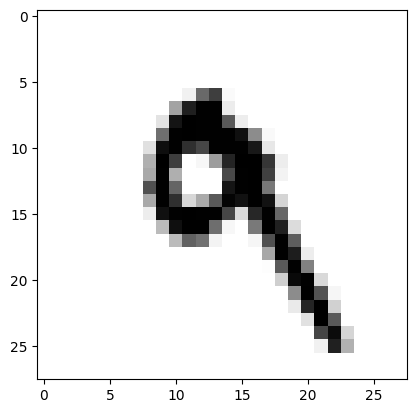

pred: 9, prob: 0.99, true: 9


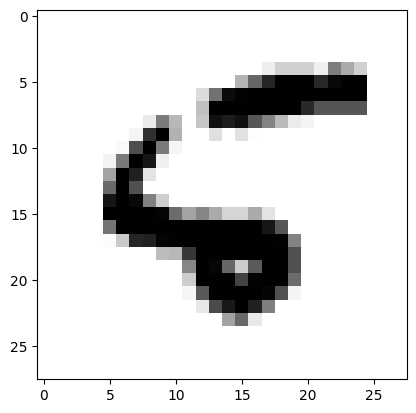

pred: 2, prob: 0.90, true: 5


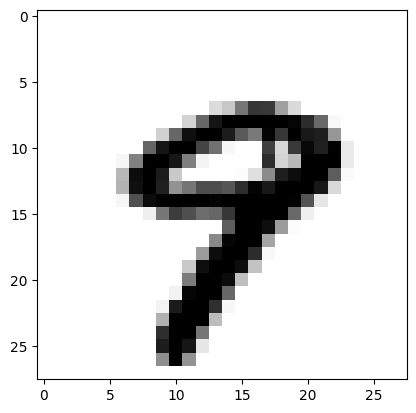

pred: 9, prob: 0.85, true: 9


In [ ]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))

Accuracy
1. first experiment:
(1.00 + 0.68 + 0.99 + 1.00 + 0.97 + 0.99 + 0.99 + 0.99 + 0.89 + 0.96) / 10 * 100
= 94.60000000000001 ≒ 94.6(%)
2. second experiment:
(1.00 + 0.69 + 0.99 + 0.99 +  0.98 + 0.99 + 0.99 + 0.99 + 0.96 + 0.86) / 10 * 100 = 94.40000000000002 ≒ 94.4(%)
3. third experiment:
(1.00 + 0.58 + 0.99 + 1.00  + 0.95 + 0.98 + 0.99 + 0.99 + 0.80 + 0.91) / 10 * 100 = 91.90000000000002 ≒ 91.9(%)
4. fourth experiment:
(1.00 + 0.72 + 1.00 + 1.00 + 0.97 + 0.99 + 0.99 + 0.99 + 0.92 + 0.84) / 10 * 100 = 94.19999999999999 ≒ 94.2(%)
5. fifth experiment:
(1.00 + 0.82 + 0.99 + 1.00 + 0.96 + 0.98 + 0.98 + 0.99 + 0.90 + 0.85) / 10 * 100 = 94.7(%)

In [ ]:
(94.60000000000001 + 94.40000000000002 + 91.90000000000002 + 94.19999999999999 + 94.7 ) / 5

93.96000000000001

 ### Model obtained about 94.0% accuracy on average using five experiments (94.6%, 94.4%, 91.9%, 94.2%, 94.7%).

 ### ⇒ The performace of the model has improved (accuracy of 92.1% to **94.0%**)



### < Changes/additions made to improve the performance of the neural network model >

- Changed activation function: sigmoid_prime
- Added new activation fuction: relu, relu_prime
- Changed loss fuctions: mse_prime
- Added new loss functions: sse, sse_prime
- Added more layers: FlattenLayer & SoftmaxLayer
- Changed epoch: 500 to 40